In [ ]:
#import requests

#response = requests.get('https://www.politifact.com/factchecks/list/?page=2&category=coronavirus')
#response.text

'\n<!DOCTYPE html>\n<html lang="en-US" dir="ltr">\n<head>\n<meta charset="utf-8">\n<meta http-equiv="x-ua-compatible" content="ie=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title> | PolitiFact </title>\n<meta name="description" content="PolitiFact is a fact-checking website that rates the accuracy of claims by elected officials and others on its Truth-O-Meter." />\n<meta name="twitter:username" content="PolitiFact" />\n<meta name="twitter:card" content="summary" />\n<meta name="twitter:site" content="PolitiFact">\n<meta name="twitter:url" content="" />\n<meta name="twitter:title" content="" />\n<meta name="twitter:description" content="PolitiFact is a fact-checking website that rates the accuracy of claims by elected officials and others on its Truth-O-Meter." />\n<meta name="twitter:image" content="" />\n<link rel="shortcut icon" type="image/ico" href="https://static.politifact.com/images/favicon.ico">\n<link rel="icon" type="image/png" href="https:

In [1]:
import pandas as pd
import requests

from bs4 import BeautifulSoup

In [59]:
finalData = []
#upperframe = []
#keywords = ['covid','corona','virus']
keywords = ['facebook']
for page in range(1,2000):
  #finalData = []
  url = 'https://www.politifact.com/api/factchecks/?page='+str(page)
  response = requests.get(url)
  data = response.json()
  result = []
  if 'results' in data:
    result = data['results']

  if result != []:  
    for res in result:
      
      Statement = BeautifulSoup(res['statement'], "lxml").text
      Statement = Statement.encode('ascii','ignore')
      Statement = Statement.decode('utf-8','ignore')

      Sources = BeautifulSoup(res['sources'], "lxml").text
      Sources = Sources.encode('ascii','ignore')
      Sources = Sources.decode('utf-8','ignore')


      #if b'corona' in Statement.lower():
      if any(word in Sources.lower() for word in keywords):
      #if True:
        #if b'covid' in Statement:
        Sequence = res['id']
        
        Ruling_Comments = BeautifulSoup(res['ruling_comments'], "lxml").text
        Ruling_Comments = Ruling_Comments.encode('ascii','ignore')
        Ruling_Comments = Ruling_Comments.decode('utf-8','ignore')
        
        Ruling_Slug = res['ruling_slug']
        
        Slug = res['slug']

        Speaker = res['speaker']['full_name']
        Speaker_Slug = res['speaker']['slug']
        
        finalData.append([Sequence,Ruling_Comments,Slug,Sources,Speaker,Speaker_Slug,Statement,Ruling_Slug])
#upperframe.extend(finalData)
dataset=pd.DataFrame(finalData)
dataset.columns = ['Sequence','Ruling_Comments','Slug','Sources','Speaker','Speaker_Slug','Statement','Ruling_Slug']
#finalData
#dataset
#response.json()
dataset

,Sequence,Ruling_Comments,Slug,Sources,Speaker,Speaker_Slug,Statement,Ruling_Slug
0,19130,A collage of three images being shared on Face...,old-photos-barack-obama-misused-fuel-baseless-...,"Facebook post, July 21, 2020\nRappler, False: ...",Viral image,viral-image,Photos show former President Barack Obama acti...,pants-fire
1,19129,A former U.S. senatorial candidate says the vi...,dnc-did-not-omit-one-nation-under-god-pledge-a...,"Ballotpedia, Peggy Hubbard\nDemocratic Nationa...",Peggy Hubbard,peggy-hubbard,The DNC omitted one nation under God from the ...,barely-true
2,19128,Multiple Facebook users have shared an image t...,no-photo-doesnt-show-joe-biden-kissing-or-biti...,"Facebook post, Aug. 2, 2020\nFacebook post, Au...",Viral image,viral-image,Says this photo shows Joe Biden kissing and bi...,false
3,19127,A headline about voting rights and House Speak...,recent-headlines-about-pelosi-disenfranchising...,"Facebook post, Aug. 14, 2020\nThe Washington P...",Viral image,viral-image,Says Nancy Pelosi wants to remove votes from s...,false
4,19126,Health officials among others are advocating f...,postal-service-doesnt-say-never-mail-cash-othe...,"Facebook post, Aug. 16, 2020\nEmail interview ...",Facebook posts,facebook-posts,The Post Office advises never send cash in the...,barely-true
...,...,...,...,...,...,...,...,...
1754,1219,President Barack Obama's recent decision to ha...,palin-says-defense-spending-was-tiny-portion-s...,"Defense Department, Information on the Recov...",Sarah Palin,sarah-palin,"""The Defense Department received only one-half...",mostly-true
1755,1180,\n In his address to a joint session of Congre...,obama-correct-death-panel-charge-lie,"\n Barack Obama,\n \n address\n \n to a joint...",Barack Obama,barack-obama,"""The claim ... that we plan to set up panels o...",true
1756,1133,\n After wide denunciation (\n \n including h...,palin-claims-obama-misled-when-he-said-end-lif...,"\n Facebook,\n \n Sarah Palin: ""Concerning th...",Sarah Palin,sarah-palin,A provision in the health care reform bill for...,false
1757,1126,"\r\n\tSarah Palin, the former governor of Alas...",sarah-palin-barack-obama-death-panel,"\r\n\tSarah Palin on Facebook, Statement on t...",Sarah Palin,sarah-palin,"\r\n\tSeniors and the disabled ""will have to s...",pants-fire


In [60]:
dataset=pd.DataFrame(dataset)
dataset.to_csv('APIData2208-FB.csv')

In [210]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [211]:
df = pd.read_csv('APIData2000-FB.csv')

In [212]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [213]:
df.head()

,Sequence,Ruling_Comments,Slug,Sources,Speaker,Speaker_Slug,Statement,Ruling_Slug
0,18873,"Texas schools will be open this fall, but pare...",some-covid-19-deaths-have-been-children,"NBC DFW, Cornyn on COVID-19: We Still Don't Kn...",John Cornyn,john-cornyn,Says no one under the age of 20 has died of th...,false
1,18870,Do the Kiwis have something exceptional to sho...,yes-science-led-new-zealand-currently-has-no-l...,"Facebook, post (archived here), July 7, 2020\n...",Facebook posts,facebook-posts,New Zealand let health experts rather than pol...,mostly-true
2,18863,At a campaign event in western North Carolina ...,nc-republican-wrongfully-says-masks-do-not-work,"Story by the Hendersonville Times-News, ""Fores...",Dan Forest,dan-forest,"Multiple studies all said for decades, masks d...",false
3,18859,A Facebook user who recently shared what he de...,photo-discharge-paperwork-shows-outdated-recom...,"Facebook post, June 26, 2020\nBeaumont Emergen...",Viral image,viral-image,A patient discharge document proves that The W...,barely-true
4,18860,Images shared on Facebook claim LeBron James d...,images-mischaracterize-lebron-james-views-whit...,"Facebook, post, June 6, 2020\nFacebook, post, ...",Viral image,viral-image,"Quotes LeBron James as saying, I dont want not...",barely-true


In [214]:
df.shape

(1614, 8)

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sequence         1614 non-null   int64 
 1   Ruling_Comments  1614 non-null   object
 2   Slug             1614 non-null   object
 3   Sources          1614 non-null   object
 4   Speaker          1614 non-null   object
 5   Speaker_Slug     1614 non-null   object
 6   Statement        1614 non-null   object
 7   Ruling_Slug      1614 non-null   object
dtypes: int64(1), object(7)
memory usage: 101.0+ KB


In [216]:
df.isnull().sum(axis = 1)

0       0
1       0
2       0
3       0
4       0
       ..
1609    0
1610    0
1611    0
1612    0
1613    0
Length: 1614, dtype: int64

In [217]:
df.Ruling_Slug.unique()

array(['false', 'mostly-true', 'barely-true', 'pants-fire', 'half-true',
       'true', 'half-flip', 'full-flop', 'no-flip'], dtype=object)

In [218]:
df = df[df['Ruling_Slug']!= 'no-flip']
df = df[df['Ruling_Slug']!= 'full-flop'] 
df = df[df['Ruling_Slug']!= 'half-flip']
df = df[df['Ruling_Slug']!= 'barely-true']
df.Ruling_Slug.unique()

array(['false', 'mostly-true', 'pants-fire', 'half-true', 'true'],
      dtype=object)

In [219]:
df.loc[df['Ruling_Slug'] == 'half-true', 'Ruling_Slug'] = 'true'
df.loc[df['Ruling_Slug'] == 'mostly-true', 'Ruling_Slug'] = 'true'
df.loc[df['Ruling_Slug'] == 'mostly-false', 'Ruling_Slug'] = 'false'
df.loc[df['Ruling_Slug'] == 'pants-fire', 'Ruling_Slug'] = 'false'
#df.loc[df['Ruling_Slug'] == 'barely-true', 'Ruling_Slug'] = 'false'
df.Ruling_Slug.unique()

array(['false', 'true'], dtype=object)

In [220]:
labels = df.Ruling_Slug
labels.unique()

array(['false', 'true'], dtype=object)

In [221]:
df.shape

(1409, 8)

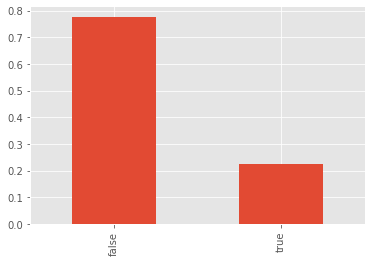

In [222]:
import numpy as np
(df['Ruling_Slug'].value_counts()/np.float(len(df))).plot.bar()

In [223]:
print(labels.value_counts(), '\n')

false    1095
true      314
Name: Ruling_Slug, dtype: int64 



In [224]:
# balancing the dataset 
from sklearn.utils import resample
df_majority = df[df['Ruling_Slug']=='false']
df_minority = df[df['Ruling_Slug']=='true']
df_minority_oversampled = resample(df_minority, replace=True, n_samples=1214, random_state=0)
df_oversampled = pd.concat([df_majority, df_minority_oversampled])
df_oversampled['Ruling_Slug'].value_counts()

true     1214
false    1095
Name: Ruling_Slug, dtype: int64

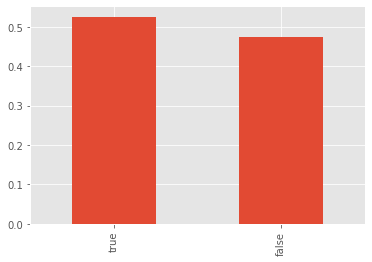

In [225]:
(df_oversampled['Ruling_Slug'].value_counts()/np.float(len(df_oversampled))).plot.bar()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


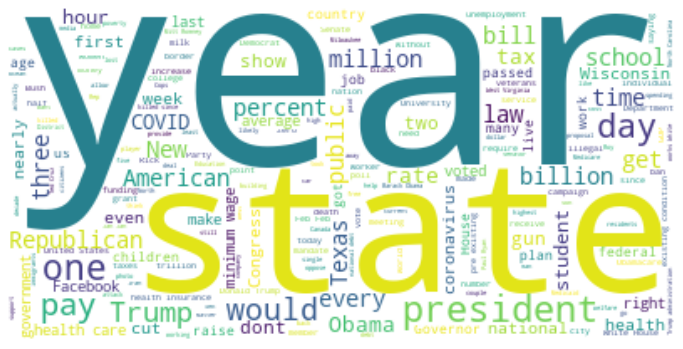

In [226]:
# Wordcloud beautification for True news

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
plt.style.use('ggplot')

from wordcloud import WordCloud

stopwords = nltk.corpus.stopwords.words('english')
extendStopWords = ['Say','Says','said','people']
stopwords.extend(extendStopWords)

true_word_tokens = pd.Series(
    df[df['Ruling_Slug'] == 'true'].Statement.tolist()).str.cat(sep=' ')

wordcloud = WordCloud(max_font_size=200, stopwords=stopwords, random_state=None, background_color='white').generate(true_word_tokens)

plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

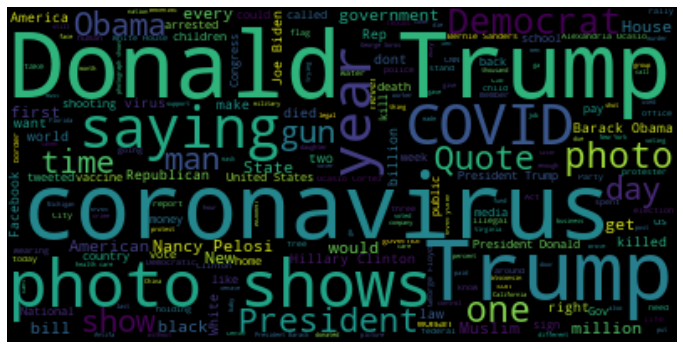

In [227]:
false_word_tokens = pd.Series(
    df[df['Ruling_Slug'] == 'false'].Statement.tolist()).str.cat(sep=' ')

wordcloud = WordCloud(max_font_size=200, stopwords=stopwords, random_state=None, background_color='black').generate(false_word_tokens)

plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [228]:

labels = df.Ruling_Slug

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0de774d828>,
      dtype=object)

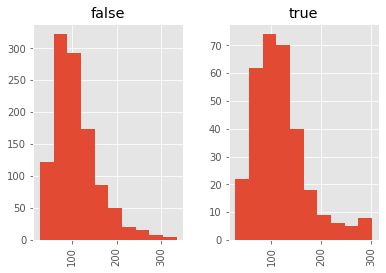

In [229]:
#  the number of characters present in each text by labels
df['Statement'].str.len().hist(by=df['Ruling_Slug'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0de6cdb668>,
      dtype=object)

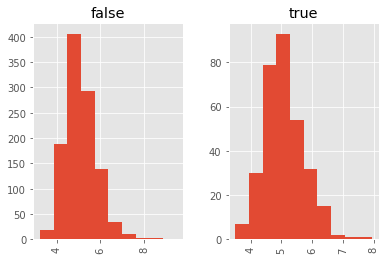

In [230]:
# Word level analysis of title
df['Statement'].str.split().apply(lambda x:[len(i) for i in x]).map(lambda x: np.mean(x)).hist(by=df['Ruling_Slug'])

In [231]:
x_train,x_test,y_train,y_test=train_test_split(df['Statement'].values.astype('str'), labels, test_size=0.3, random_state=7)


In [232]:
tfidf_vectorizer=TfidfVectorizer(stop_words=stopwords, max_df=10, min_df = 1, max_features=1000, analyzer='word',ngram_range=(2,2))


In [233]:
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['say', 'says'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [234]:
pa_classifier=PassiveAggressiveClassifier(C=0.5,max_iter=150)
pa_classifier.fit(tfidf_train,y_train)


PassiveAggressiveClassifier(C=0.5, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=150, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [235]:
y_pred=pa_classifier.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 80.38%


In [236]:
confusion_matrix(y_test,y_pred, labels=['true','false'])


array([[ 15,  61],
       [ 22, 325]])

In [237]:
from sklearn.metrics import classification_report
print(f"PA Classification Report : \n\n{classification_report(y_test, y_pred)}") 


PA Classification Report : 

              precision    recall  f1-score   support

       false       0.84      0.94      0.89       347
        true       0.41      0.20      0.27        76

    accuracy                           0.80       423
   macro avg       0.62      0.57      0.58       423
weighted avg       0.76      0.80      0.78       423



In [196]:
#y_pred

In [238]:
from sklearn.metrics import classification_report
scoreMatrix = []
confusionMatrix = []
classificationMatrix = []

j = [0.10,0.30,0.40]
ratio = ["80:20","70:30","60:40"]
for i in range(3):
  x_train,x_test,y_train,y_test=train_test_split(df['Statement'].values.astype('str'), labels, test_size=j[i], random_state=7)
  tfidf_vectorizer=TfidfVectorizer(stop_words=stopwords, max_df=10, min_df = 1, max_features=1000, analyzer='word',ngram_range=(2,2))
  tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
  tfidf_test=tfidf_vectorizer.transform(x_test)
  pa_classifier=PassiveAggressiveClassifier(C=0.5,max_iter=150)
  pa_classifier.fit(tfidf_train,y_train)
  y_pred=pa_classifier.predict(tfidf_test)
  scoreMatrix.append(accuracy_score(y_test,y_pred))

  print(f'Split Ratio: {ratio[i]}')
  print(f'Accuracy: {round(scoreMatrix[i]*100,2)}%')
  confusionMatrix.append(confusion_matrix(y_test,y_pred, labels=['true','false']))
  
  print(f"Classification Report: \n{classification_report(y_test, y_pred)}\n\n") 
  classificationMatrix.append(classification_report(y_test, y_pred))


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['say', 'says'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['say', 'says'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['say', 'says'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Split Ratio: 80:20
Accuracy: 80.14%
Classification Report: 
              precision    recall  f1-score   support

       false       0.83      0.96      0.89       114
        true       0.44      0.15      0.22        27

    accuracy                           0.80       141
   macro avg       0.64      0.55      0.55       141
weighted avg       0.75      0.80      0.76       141



Split Ratio: 70:30
Accuracy: 80.14%
Classification Report: 
              precision    recall  f1-score   support

       false       0.84      0.93      0.89       347
        true       0.39      0.20      0.26        76

    accuracy                           0.80       423
   macro avg       0.62      0.57      0.57       423
weighted avg       0.76      0.80      0.77       423



Split Ratio: 60:40
Accuracy: 76.77%
Classification Report: 
              precision    recall  f1-score   support

       false       0.80      0.94      0.87       449
        true       0.30      0.10      0.15       115

[[ 12 103]
 [ 28 421]]


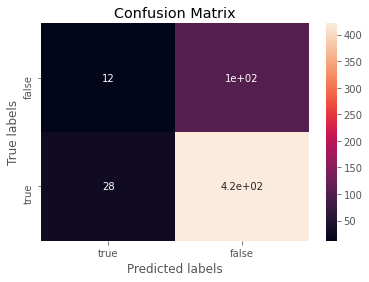

In [239]:
labels = ['true', 'false']
cm = confusion_matrix(y_test,y_pred, labels=labels)
print(cm)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['true', 'false']); ax.yaxis.set_ticklabels(['false', 'true']);

In [240]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps= [('tfidf', TfidfVectorizer(stop_words=stopwords, max_df=10, min_df = 1, max_features=1000, analyzer='word',ngram_range=(2,2))),
                            ('model', PassiveAggressiveClassifier(C=0.5,max_iter=150))])


In [241]:
pipeline.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['say', 'says'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=10, max_features=1000,
                                 min_df=1, ngram_range=(2, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you'...
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 PassiveAggressiveClassifier(C=0.5, average=False,
                                          

In [242]:
pipeline.predict(x_train)

array(['false', 'false', 'false', 'false', 'false', 'false', 'true',
       'false', 'false', 'false', 'false', 'false', 'false', 'false',
       'false', 'false', 'true', 'true', 'false', 'false', 'false',
       'true', 'false', 'true', 'false', 'false', 'true', 'false',
       'false', 'false', 'false', 'false', 'false', 'false', 'false',
       'false', 'false', 'false', 'false', 'false', 'false', 'false',
       'true', 'false', 'false', 'false', 'true', 'false', 'false',
       'true', 'false', 'false', 'false', 'false', 'false', 'false',
       'false', 'false', 'false', 'false', 'true', 'false', 'false',
       'false', 'false', 'false', 'false', 'false', 'false', 'false',
       'false', 'false', 'false', 'false', 'false', 'false', 'false',
       'false', 'false', 'false', 'false', 'false', 'false', 'false',
       'false', 'false', 'false', 'false', 'false', 'false', 'false',
       'false', 'true', 'false', 'false', 'true', 'false', 'false',
       'true', 'false', 'false',

In [246]:
text = ["higher R in the North West and South West is an important part of moving towards a more localised approach to lockdown"]

pipeline.predict(text)

array(['false'], dtype='<U5')

In [249]:
from joblib import dump

dump(pipeline, filename="news_classifier.joblib")



['news_classifier.joblib']

In [250]:
pipeline

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=10, max_features=1000,
                                 min_df=1, ngram_range=(2, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you'...
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 PassiveAggressiveClassifier(C=0.5, average=False,
                                          

# **GOOGLE SEARCH ENGINE**

In [3]:
#pip install beautifulsoup4
#pip install google


In [251]:
#import beautifulsoup4

import google

try: 
    from googlesearch import search 
except ImportError:  
    print("No module named 'google' found") 
  
# to search 
query = "Everyone should use their judgement to help slow the spread of coronavirus when travelling. The safest thing to do is not to leave Ireland unless it is for essential reasons. If you arrive in Ireland from any other country you will need to fill in a form called the Public Health Passenger Locator Form "
  
for j in search(query, tld="co.in", num=10, stop=10, pause=2): 
    print(j) 

https://wwwnc.cdc.gov/travel/notices/warning/coronavirus-ireland
https://www.facebook.com/HSElive/photos/a.527189934147811/1477510065782455/?type=3
https://www.gov.ie/en/publication/cf9b0d-new-public-health-measures-effective-now-to-prevent-further-spread-o/
https://www.gov.ie/en/publication/e885b2-covid-19-coronavirus-travel-advice/?referrer=/locatorform/
https://www.gov.uk/foreign-travel-advice/ireland/coronavirus
https://www2.hse.ie/conditions/coronavirus/protect-yourself-and-others.html
https://www.nidirect.gov.uk/articles/coronavirus-covid-19-travel-advice
https://www.dfa.ie/travel/travel-advice/coronavirus/
https://www.state.nj.us/health/cd/documents/topics/NCOV/COVID-19-PUBLIC%20FAQs_03202020.pdf
https://www.worldnomads.com/travel-safety/caribbean/jamaica/travel-alert-jamaica
